In [1]:
import os
os.chdir(r'C:\Users\Wojtek\Documents\Projects\MLPlayground\artykuliki\DataStandarization')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

train_p = r'train.csv'
train_csv = pd.read_csv(train_p)

train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = ['Survived']

x = train_csv[features]
y = train_csv[target].values

In [4]:
column_values = x['Sex'].values

le = LabelEncoder()
le.fit(np.unique(column_values))

x.loc[:, 'Sex'] = le.transform(column_values)

x.head()

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [6]:
age_median = x['Age'].median()
x['Age'].fillna(age_median, inplace=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
x_train, x_test = x.iloc[:500, :], x.iloc[500:, :]
y_train, y_test = np.ravel(y[:500]), np.ravel(y[500:])

In [8]:
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

svc_classifier.score(x_test, y_test)

0.6828644501278772

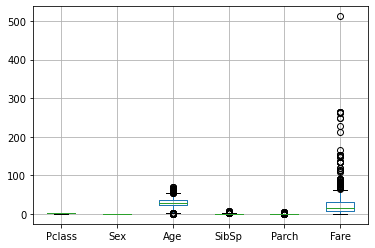

In [9]:
x_train.boxplot()

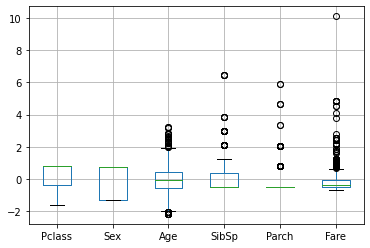

In [10]:
standard_scaler = StandardScaler()
x_train_standarized = standard_scaler.fit_transform(x_train)
x_test_standarized = standard_scaler.transform(x_test)

x_train_standardized = pd.DataFrame(columns = x_train.columns, data = x_train_standarized)
x_train_standardized.boxplot()

In [11]:
standard_scaler.mean_ == np.mean(x_train.values, axis=0)
standard_scaler.scale_ == np.std(x_train.values, axis=0)

array([ True,  True,  True,  True,  True,  True])

In [12]:
svc_classifier.fit(x_train_standarized, y_train)
svc_classifier.score(x_test_standarized, y_test)

0.8286445012787724

In [27]:
df = pd.DataFrame(columns = ['a', 'b', 'c', 'd', 'e', 'f'], data=np.zeros((3, 6)))

In [28]:
df

,a,b,c,d,e,f
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_new = df.iloc[:, :3]

In [30]:
df.columns.values

array(['a', 'b', 'c', 'd', 'e', 'f'], dtype=object)

In [31]:
df_new['times'] = df.columns[3:]

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_new

,a,b,c,times
0,0.0,0.0,0.0,d
1,0.0,0.0,0.0,e
2,0.0,0.0,0.0,f
